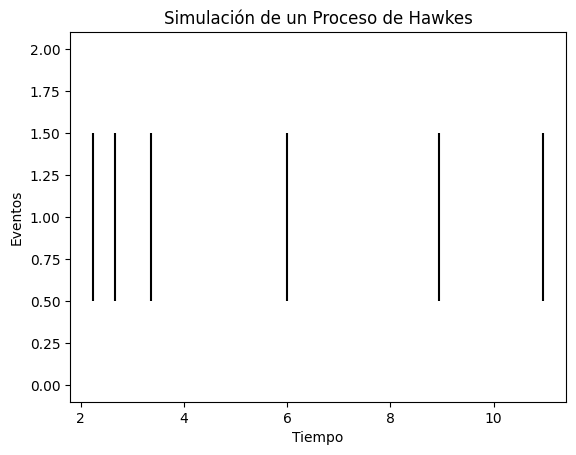

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes(lambda_0, alpha, beta, T, max_events=1000):
    times = []         # Lista para almacenar los tiempos de los eventos
    current_time = 0   # Tiempo actual
    lambda_t = lambda_0  # Intensidad actual

    while current_time < T and len(times) < max_events:
        # Calcular el tiempo de espera hasta el siguiente evento
        wait_time = np.random.exponential(scale=1/lambda_t)
        current_time += wait_time
        
        # Actualizar la intensidad después de cada evento
        lambda_t = lambda_0 + alpha * sum(np.exp(-beta * (current_time - np.array(times))))
        
        # Registrar el evento
        times.append(current_time)

    return times

# Parámetros del modelo
lambda_0 = 0.5
alpha = 0.8
beta = 1.5
T = 10

# Simulación
simulated_times = simulate_hawkes(lambda_0, alpha, beta, T)

# Visualización
plt.eventplot(simulated_times, orientation='horizontal', color='black')
plt.xlabel('Tiempo')
plt.ylabel('Eventos')
plt.title('Simulación de un Proceso de Hawkes')
plt.show()


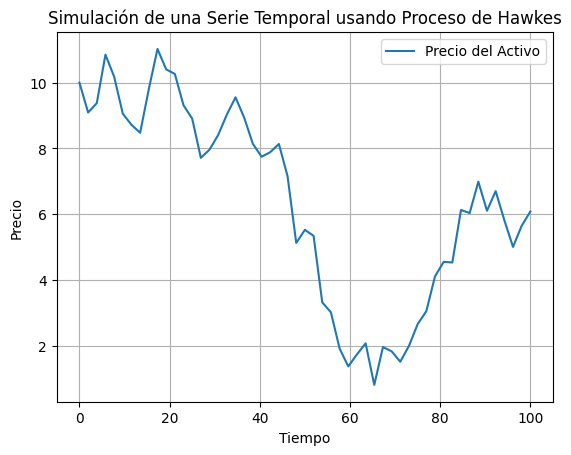

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes_series(lambda_0, alpha, beta, T, max_events=1000, initial_price=100):
    times = []          # Lista para almacenar los tiempos de los eventos
    current_time = 0    # Tiempo actual
    lambda_t = lambda_0 # Intensidad actual
    price_series = [initial_price]  # Lista para almacenar los precios

    while current_time < T and len(times) < max_events:
        # Calcular el tiempo de espera hasta el siguiente evento
        wait_time = np.random.exponential(scale=1/lambda_t)
        current_time += wait_time
        
        # Actualizar la intensidad después de cada evento
        lambda_t = lambda_0 + alpha * sum(np.exp(-beta * (current_time - np.array(times))))
        
        # Registrar el evento
        times.append(current_time)
        
        # Generar un cambio de precio aleatorio
        price_change = np.random.normal(loc=0, scale=1)  # Puedes ajustar loc y scale para mayor realismo
        new_price = price_series[-1] + price_change
        price_series.append(new_price)

    # Generar una serie temporal de tiempos
    time_series = np.linspace(0, T, len(price_series))
    
    return time_series, price_series

# Parámetros del modelo
lambda_0 = 0.5
alpha = 0.8
beta = 1.5
T = 100
initial_price = 10

# Simulación
time_series, price_series = simulate_hawkes_series(lambda_0, alpha, beta, T, initial_price=initial_price)

# Visualización de la serie temporal
plt.plot(time_series, price_series, label='Precio del Activo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.title('Simulación de una Serie Temporal usando Proceso de Hawkes')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
price_series

[10,
 9.092024060797394,
 9.378978403481666,
 10.853283029163936,
 10.183050294695526,
 9.055987436322955,
 8.718797791130159,
 8.475445894025034,
 9.804704014742324,
 11.027271757009974,
 10.405693281814736,
 10.266246123856373,
 9.312314598487259,
 8.90831650402367,
 7.7128666082937904,
 7.962203577506527,
 8.408623567021284,
 9.03027200339875,
 9.554859315176175,
 8.93388588970911,
 8.140037772142438,
 7.747179670517196,
 7.88415328961013,
 8.13460265218781,
 7.154673411520003,
 5.124165823992691,
 5.521927651036474,
 5.340264085754692,
 3.3158046821457727,
 3.01202446666303,
 1.9123968692048843,
 1.3664586177095481,
 1.73028534417417,
 2.06959103612008,
 0.8028943355994655,
 1.9552352548574183,
 1.8254905128588452,
 1.5088350093107956,
 1.989728844586087,
 2.6505756842122707,
 3.0452029381763355,
 4.102466488106099,
 4.5473680091875694,
 4.528221741448712,
 6.126346001813385,
 6.0327017788682005,
 6.986546324035277,
 6.102829038005316,
 6.700080043043346,
 5.812789325126722,
 5.002